In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Analisis

## Loading Data

In [2]:
data_path = "/content/Data Quiz 2 BA.xlsx"
data_penggunaan = pd.read_excel(data_path, sheet_name="Sheet1")
data_2FA = pd.read_excel(data_path, sheet_name="Sheet4")

In [3]:
data_penggunaan.head(4)

,ID,Rentang Usia,Pendidikan Terakhir,apakah password anda menggandung personal information?,Seberapa sering anda mengganti password anda?,Perkiraan penggunaan internet selama sepekan,Apa saja sarana yang pernah anda gunakan dalam bertransaksi online
0,A1,11-20 tahun,SMA,tidak,hanya ketika sistem meminta penggantian,Lebih dari 40 jam,"e-market place (shopee, bukalapak, tokopedia,dll)"
1,A2,21-30 tahun,SMA,tidak,hanya ketika sistem meminta penggantian,Lebih dari 40 jam,"sosial media ( facebook, Ig, WA, dll), e-marke..."
2,A3,11-20 tahun,SMA,ya,tidak pernah,Antara 21-40 jam,"e-market place (shopee, bukalapak, tokopedia,dll)"
3,A4,21-30 tahun,SMA,tidak,sekali setahun,Lebih dari 40 jam,"sosial media ( facebook, Ig, WA, dll), e-marke..."


In [4]:
data_2FA.head(4)

,ID,Two-Factor Authentication (2FA) adalah otentikasi dua faktor (keamanan ganda) sehingga dapat melindungi akun online Anda dari aneka peretasan digital. apakah anda menerapkan nya pada akun digital anda berikut ini: [Gmail],Two-Factor Authentication (2FA) adalah otentikasi dua faktor (keamanan ganda) sehingga dapat melindungi akun online Anda dari aneka peretasan digital. apakah anda menerapkan nya pada akun digital anda berikut ini: [Akun email resmi kantor/kampus anda],"Two-Factor Authentication (2FA) adalah otentikasi dua faktor (keamanan ganda) sehingga dapat melindungi akun online Anda dari aneka peretasan digital. apakah anda menerapkan nya pada akun digital anda berikut ini: [sosial media (IG, Facebook, tiktok dll)]","Two-Factor Authentication (2FA) adalah otentikasi dua faktor (keamanan ganda) sehingga dapat melindungi akun online Anda dari aneka peretasan digital. apakah anda menerapkan nya pada akun digital anda berikut ini: [komunkasi (WA, LINE, Discord, Telegram dll)]","Two-Factor Authentication (2FA) adalah otentikasi dua faktor (keamanan ganda) sehingga dapat melindungi akun online Anda dari aneka peretasan digital. apakah anda menerapkan nya pada akun digital anda berikut ini: [e-commerce (Shopee, Gojek, Tokopedia..)]",Apakah anda merasa toko online/penyedia layanan menunjukkankepedulian terhadap kerahasiaan informasi pribadi para penggunanya,Apakah anda merasa merasa toko online tidak akan memberikan informasi pribadi penggunanya keperusahaan lain tanpa sepengetahuan pengguna,Apakah anda merasa terdapat resiko saat memberikan informasi pribadi pada toko online
0,A1,Ya,Tidak,Ya,Ya,Ya,Ya,Ragu-ragu,Ya
1,A2,Ya,Ya,Ya,Ya,Ya,Ragu-ragu,Ragu-ragu,Ya
2,A3,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
3,A4,Tidak,Ya,Ya,Tidak,Ya,Ragu-ragu,Ragu-ragu,Ya


Dapat dilihat header yang dimiliki lumayan padat dengan teks, mari kita ubah headernya menjadi lebih singkat untuk memudahkan pengaksesan kolom

## Data cleaning and transform

In [5]:
data_penggunaan.columns = ["ID","Usia","Pendidikan","personal_info_in_pass","change_pass_freq","internet_usage","online_transaction_app"]
data_2FA.columns = ["ID","gmail_2FA","gmail_2FA_kantor","social_media_2FA","com_media_2FA","ecom_2FA","ecommerce_privacy_care","ecommerce_notgive_data","ecommerce_risk"]

In [6]:
data_penggunaan.columns

Index(['ID', 'Usia', 'Pendidikan', 'personal_info_in_pass', 'change_pass_freq',
       'internet_usage', 'online_transaction_app'],
      dtype='object')

In [7]:
data_2FA.columns

Index(['ID', 'gmail_2FA', 'gmail_2FA_kantor', 'social_media_2FA',
       'com_media_2FA', 'ecom_2FA', 'ecommerce_privacy_care',
       'ecommerce_notgive_data', 'ecommerce_risk'],
      dtype='object')

Sekarang mari kita cek apabila ada data yang kosong dari dataset yang kita miliki

In [8]:
data_2FA.isna().sum()

ID                        0
gmail_2FA                 0
gmail_2FA_kantor          0
social_media_2FA          0
com_media_2FA             0
ecom_2FA                  0
ecommerce_privacy_care    0
ecommerce_notgive_data    0
ecommerce_risk            0
dtype: int64

In [9]:
data_penggunaan.isna().sum()

ID                        0
Usia                      0
Pendidikan                0
personal_info_in_pass     0
change_pass_freq          6
internet_usage            0
online_transaction_app    0
dtype: int64

ada data change password frequency yang dikosongkan, mari kita isi

In [10]:
mode_value = data_penggunaan['change_pass_freq'].mode().values[0]
print(mode_value)
data_penggunaan.change_pass_freq.fillna(mode_value, inplace=True)

hanya ketika sistem meminta penggantian


In [11]:
data_penggunaan.isna().sum()

ID                        0
Usia                      0
Pendidikan                0
personal_info_in_pass     0
change_pass_freq          0
internet_usage            0
online_transaction_app    0
dtype: int64

Data sudah terisi semua, mari kita melihat value-value unik apa saja yang dimiliki setiap kolom dari kedua sheet tersebut

In [12]:
data_penggunaan_kolom = data_penggunaan.columns
data_penggunaan_unique = {}
for kolom in data_penggunaan_kolom[1:]:
  data_penggunaan_unique[kolom] = data_penggunaan[kolom].unique().tolist()
data_penggunaan_unique

{'Usia': ['11-20 tahun', '21-30 tahun', '31-40 tahun', 'lebih dari 41 tahun'],
 'Pendidikan': ['SMA',
  'Sarjana (S1 dan D4)',
  'SMP',
  'Diploma ( D1-D3)',
  'Paska sarjana (S2 dan S3)',
  'SD',
  'Diploma (D1-D3)'],
 'personal_info_in_pass': ['tidak',
  'ya',
  'Tidak',
  'tidak tahu',
  'Ya',
  'Tidak Tahu'],
 'change_pass_freq': ['hanya ketika sistem meminta penggantian',
  'tidak pernah',
  'sekali setahun',
  'Hanya ketika sistem meminta penggantian',
  'setahun 4x',
  'Tidak pernah',
  'setahun 2x',
  'tiap bulan',
  'Setahun 4x',
  'Sekali setahun',
  'Setahun 2x',
  'Setiap bulan'],
 'internet_usage': ['Lebih dari 40 jam',
  'Antara 21-40 jam',
  'Kurang dari 20 jam'],
 'online_transaction_app': ['e-market place (shopee, bukalapak, tokopedia,dll)',
  'sosial media ( facebook, Ig, WA, dll), e-market place (shopee, bukalapak, tokopedia,dll), applikasi yang dikeluarkan perusahaan penyedia barang/ jasa (KAI, garuda, apple store, dll)',
  'e-market place (shopee, bukalapak, tokope

Dapat dilihat terdapat beberapa masalah dalam data berupa huruf kecil dan besar yang menyebabkan value unique yang berbeda, mari kita selesaikan masalah tersebut

In [13]:
data_penggunaan['Pendidikan'] = data_penggunaan['Pendidikan'].replace({'Diploma ( D1-D3)': 'Diploma (D1-D3)'})
data_penggunaan['Pendidikan'].unique()

array(['SMA', 'Sarjana (S1 dan D4)', 'SMP', 'Diploma (D1-D3)',
       'Paska sarjana (S2 dan S3)', 'SD'], dtype=object)

In [14]:
data_penggunaan['personal_info_in_pass'] = data_penggunaan['personal_info_in_pass'].apply(lambda x: x.lower())
data_penggunaan['personal_info_in_pass'].unique()

array(['tidak', 'ya', 'tidak tahu'], dtype=object)

In [15]:
data_penggunaan['change_pass_freq'] = data_penggunaan['change_pass_freq'].apply(lambda x: x.lower())
data_penggunaan['change_pass_freq'] = data_penggunaan['change_pass_freq'].replace('tiap bulan','setiap bulan')
data_penggunaan['change_pass_freq'].unique()

array(['hanya ketika sistem meminta penggantian', 'tidak pernah',
       'sekali setahun', 'setahun 4x', 'setahun 2x', 'setiap bulan'],
      dtype=object)

Sekarang untuk kolom online transaction. kolom ini lebih sulit dicleaning karena valuenya sangat bermacam-macam. Salah satu value yang ingin diubah adalah adanya penamaan ig dan Instagram. Sebelumnya lebih baik kita jadikan lowercase semua

In [16]:
data_penggunaan['online_transaction_app'] = data_penggunaan['online_transaction_app'].apply(lambda x: x.lower())
data_penggunaan['online_transaction_app'].unique()

array(['e-market place (shopee, bukalapak, tokopedia,dll)',
       'sosial media ( facebook, ig, wa, dll), e-market place (shopee, bukalapak, tokopedia,dll), applikasi yang dikeluarkan perusahaan penyedia barang/ jasa (kai, garuda, apple store, dll)',
       'e-market place (shopee, bukalapak, tokopedia,dll), applikasi yang dikeluarkan perusahaan penyedia barang/ jasa (kai, garuda, apple store, dll)',
       'sosial media ( facebook, ig, wa, dll), e-market place (shopee, bukalapak, tokopedia,dll)',
       'sosial media ( facebook, instagram, wa, dll)',
       'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak, tokopedia, dll)',
       'sosial media ( facebook, ig, wa, dll)',
       'e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
       'e-market place (shopee, bukalapak, tokopedia, dll)',
       'sosial media ( facebook, instagram, wa, dll), e-market place (sho

Mari coba menggunakan regex untuk mengubah ig menjadi instagram dan hal-hal lainnya

In [17]:
import re

In [18]:
def clean_little_unique(x):
  text = re.sub('ig,','instagram,', x)
  text = re.sub(',dll',', dll', text)
  text = re.sub('/ jasa','/jasa',text)
  text = re.sub('applikasi','aplikasi',text)
  return text

In [19]:
# Testing
clean_little_unique('sosial media ( facebook, ig, wa, dll), hahahhihih wonderland')

'sosial media ( facebook, instagram, wa, dll), hahahhihih wonderland'

In [20]:
data_penggunaan['online_transaction_app'] = data_penggunaan['online_transaction_app'].apply(clean_little_unique)
data_penggunaan['online_transaction_app'].unique()

array(['e-market place (shopee, bukalapak, tokopedia, dll)',
       'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
       'e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
       'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak, tokopedia, dll)',
       'sosial media ( facebook, instagram, wa, dll)',
       'aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
       'sosial media ( facebook, instagram, wa, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)'],
      dtype=object)

Last Check

In [21]:
data_penggunaan_kolom = data_penggunaan.columns
data_penggunaan_unique = {}
for kolom in data_penggunaan_kolom[1:]:
  data_penggunaan_unique[kolom] = data_penggunaan[kolom].unique().tolist()
data_penggunaan_unique

{'Usia': ['11-20 tahun', '21-30 tahun', '31-40 tahun', 'lebih dari 41 tahun'],
 'Pendidikan': ['SMA',
  'Sarjana (S1 dan D4)',
  'SMP',
  'Diploma (D1-D3)',
  'Paska sarjana (S2 dan S3)',
  'SD'],
 'personal_info_in_pass': ['tidak', 'ya', 'tidak tahu'],
 'change_pass_freq': ['hanya ketika sistem meminta penggantian',
  'tidak pernah',
  'sekali setahun',
  'setahun 4x',
  'setahun 2x',
  'setiap bulan'],
 'internet_usage': ['Lebih dari 40 jam',
  'Antara 21-40 jam',
  'Kurang dari 20 jam'],
 'online_transaction_app': ['e-market place (shopee, bukalapak, tokopedia, dll)',
  'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
  'e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
  'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak

Sekarang mari kita melakukan cleaning dan pengubahan value value pada data sheet satunya lagi

In [22]:
data_2FA_kolom = data_2FA.columns
data_2FA_kolom

Index(['ID', 'gmail_2FA', 'gmail_2FA_kantor', 'social_media_2FA',
       'com_media_2FA', 'ecom_2FA', 'ecommerce_privacy_care',
       'ecommerce_notgive_data', 'ecommerce_risk'],
      dtype='object')

In [23]:
for kolom in data_2FA_kolom[1:]:
  print(data_2FA[kolom].unique().tolist())

['Ya', 'Tidak']
['Tidak', 'Ya']
['Ya', 'Tidak']
['Ya', 'Tidak']
['Ya', 'Tidak']
['Ya', 'Ragu-ragu', 'Tidak']
['Ragu-ragu', 'Tidak', 'Ya']
['Ya', 'Tidak', 'Tidak tau', 'Tidak Tahu']


Hanya ada satu kolom yang perlu di perbaiki yaitu kolom terakhir

In [24]:
data_2FA['ecommerce_risk'] = data_2FA['ecommerce_risk'].replace('Tidak tau','Tidak Tahu')
data_2FA['ecommerce_risk'].unique()

array(['Ya', 'Tidak', 'Tidak Tahu'], dtype=object)

Sekarang mari kita membuat kolom baru yang mendefinisikan tingkat literasi digital di Indonesia. Dalam hal ini tingkat literasi digital akan dihitung berdasarkan ada tidaknya info personal dalam password, seberapa sering mengganti password, Perkiraan Penggunaan, jumlah penggunaan sarana media, dan semua kolom pada data 2FA. Kita akan membuat kuantifikasi dari kolom kolom tersebut untuk menentukan seberapa tech savy atau memiliki literasi digitalnya masyarakat

Sebelumnya mari kita cek info dan desc dari kedua df tersebut

In [25]:
data_penggunaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      564 non-null    object
 1   Usia                    564 non-null    object
 2   Pendidikan              564 non-null    object
 3   personal_info_in_pass   564 non-null    object
 4   change_pass_freq        564 non-null    object
 5   internet_usage          564 non-null    object
 6   online_transaction_app  564 non-null    object
dtypes: object(7)
memory usage: 31.0+ KB


In [26]:
data_penggunaan.describe()

,ID,Usia,Pendidikan,personal_info_in_pass,change_pass_freq,internet_usage,online_transaction_app
count,564,564,564,564,564,564,564
unique,564,4,6,3,6,3,7
top,A1,21-30 tahun,SMA,tidak,hanya ketika sistem meminta penggantian,Lebih dari 40 jam,"e-market place (shopee, bukalapak, tokopedia, ..."
freq,1,331,373,298,337,273,225


In [27]:
data_2FA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      564 non-null    object
 1   gmail_2FA               564 non-null    object
 2   gmail_2FA_kantor        564 non-null    object
 3   social_media_2FA        564 non-null    object
 4   com_media_2FA           564 non-null    object
 5   ecom_2FA                564 non-null    object
 6   ecommerce_privacy_care  564 non-null    object
 7   ecommerce_notgive_data  564 non-null    object
 8   ecommerce_risk          564 non-null    object
dtypes: object(9)
memory usage: 39.8+ KB


In [28]:
data_2FA.describe()

,ID,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA,ecommerce_privacy_care,ecommerce_notgive_data,ecommerce_risk
count,564,564,564,564,564,564,564,564,564
unique,564,2,2,2,2,2,3,3,3
top,A1,Ya,Ya,Ya,Ya,Ya,Ya,Ragu-ragu,Ya
freq,1,448,293,395,407,335,286,286,419


Sekarang kita join dulu tabelnya

In [29]:
# ubah kedua ID menjadi tipe data yang sama
data_2FA['ID'] = data_2FA['ID'].astype(str)
data_penggunaan['ID'] = data_penggunaan['ID'].astype(str)

In [30]:
data_penggunaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      564 non-null    object
 1   Usia                    564 non-null    object
 2   Pendidikan              564 non-null    object
 3   personal_info_in_pass   564 non-null    object
 4   change_pass_freq        564 non-null    object
 5   internet_usage          564 non-null    object
 6   online_transaction_app  564 non-null    object
dtypes: object(7)
memory usage: 31.0+ KB


In [31]:
full_data = pd.merge(data_penggunaan, data_2FA, on=['ID'])

In [32]:
full_data.head(4)

,ID,Usia,Pendidikan,personal_info_in_pass,change_pass_freq,internet_usage,online_transaction_app,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA,ecommerce_privacy_care,ecommerce_notgive_data,ecommerce_risk
0,A1,11-20 tahun,SMA,tidak,hanya ketika sistem meminta penggantian,Lebih dari 40 jam,"e-market place (shopee, bukalapak, tokopedia, ...",Ya,Tidak,Ya,Ya,Ya,Ya,Ragu-ragu,Ya
1,A2,21-30 tahun,SMA,tidak,hanya ketika sistem meminta penggantian,Lebih dari 40 jam,"sosial media ( facebook, instagram, wa, dll), ...",Ya,Ya,Ya,Ya,Ya,Ragu-ragu,Ragu-ragu,Ya
2,A3,11-20 tahun,SMA,ya,tidak pernah,Antara 21-40 jam,"e-market place (shopee, bukalapak, tokopedia, ...",Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
3,A4,21-30 tahun,SMA,tidak,sekali setahun,Lebih dari 40 jam,"sosial media ( facebook, instagram, wa, dll), ...",Tidak,Ya,Ya,Tidak,Ya,Ragu-ragu,Ragu-ragu,Ya


Mari kita mulai melakukan kuantifikasi data dengan rule sebagai berikut:
> personal_info: ya = 0, tidak = 1, tidak tahu = 0<br>
> change pass freq: <br>
  1. 'hanya ketika sistem meminta penggantian' = 1 <br>
  2. 'tidak pernah' = 0 <br>
  3. 'sekali setahun'= 2 <br>
  4. 'setahun 4x'= 4 <br>
  5. 'setahun 2x' = 3 <br>
  6. 'setiap bulan'= 5 <br>

> internet usage: 0-20 = 1, 21-40 = 2, lebih dari 40 =3 <br>
> online transaction: tergantung jumlah penggunaan <br>
> sisanya: iya dan tidak = 1, ragu-ragu/tidak tahu = 0

In [33]:
data_penggunaan_unique

{'Usia': ['11-20 tahun', '21-30 tahun', '31-40 tahun', 'lebih dari 41 tahun'],
 'Pendidikan': ['SMA',
  'Sarjana (S1 dan D4)',
  'SMP',
  'Diploma (D1-D3)',
  'Paska sarjana (S2 dan S3)',
  'SD'],
 'personal_info_in_pass': ['tidak', 'ya', 'tidak tahu'],
 'change_pass_freq': ['hanya ketika sistem meminta penggantian',
  'tidak pernah',
  'sekali setahun',
  'setahun 4x',
  'setahun 2x',
  'setiap bulan'],
 'internet_usage': ['Lebih dari 40 jam',
  'Antara 21-40 jam',
  'Kurang dari 20 jam'],
 'online_transaction_app': ['e-market place (shopee, bukalapak, tokopedia, dll)',
  'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
  'e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
  'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak

Personal Info

In [34]:
full_data['personal_info_in_pass'] = full_data['personal_info_in_pass'].replace({'tidak': int(1)})
full_data['personal_info_in_pass'] = full_data['personal_info_in_pass'].replace({'tidak tahu': int(0)})
full_data['personal_info_in_pass'] = full_data['personal_info_in_pass'].replace({'ya': int(0)})

In [35]:
full_data['personal_info_in_pass'].unique()

array([1, 0])

change_pass_freq

In [36]:
data_penggunaan_unique['change_pass_freq']

['hanya ketika sistem meminta penggantian',
 'tidak pernah',
 'sekali setahun',
 'setahun 4x',
 'setahun 2x',
 'setiap bulan']

In [37]:
full_data['change_pass_freq'] = full_data['change_pass_freq'].replace({'tidak pernah': int(0)})
full_data['change_pass_freq'] = full_data['change_pass_freq'].replace({'hanya ketika sistem meminta penggantian': int(1)})
full_data['change_pass_freq'] = full_data['change_pass_freq'].replace({'sekali setahun': int(2)})
full_data['change_pass_freq'] = full_data['change_pass_freq'].replace({'setahun 2x': int(3)})
full_data['change_pass_freq'] = full_data['change_pass_freq'].replace({'setahun 4x': int(4)})
full_data['change_pass_freq'] = full_data['change_pass_freq'].replace({'setiap bulan': int(5)})

In [38]:
full_data['change_pass_freq'].unique()

array([1, 0, 2, 4, 3, 5])

internet usage

In [39]:
data_penggunaan_unique['internet_usage']

['Lebih dari 40 jam', 'Antara 21-40 jam', 'Kurang dari 20 jam']

In [40]:
full_data['internet_usage'] = full_data['internet_usage'].replace({'Kurang dari 20 jam': int(1)})
full_data['internet_usage'] = full_data['internet_usage'].replace({'Antara 21-40 jam': int(2)})
full_data['internet_usage'] = full_data['internet_usage'].replace({'Lebih dari 40 jam': int(3)})

In [41]:
full_data['internet_usage'].unique()

array([3, 2, 1])

Kita ubah yang sheet 2FA dulu karena menghitung sosmed membutuhkan logika yang lebih banyak

In [42]:
for kolom in data_2FA_kolom[1:]:
  print(f"{kolom} : {data_2FA[kolom].unique().tolist()}")

gmail_2FA : ['Ya', 'Tidak']
gmail_2FA_kantor : ['Tidak', 'Ya']
social_media_2FA : ['Ya', 'Tidak']
com_media_2FA : ['Ya', 'Tidak']
ecom_2FA : ['Ya', 'Tidak']
ecommerce_privacy_care : ['Ya', 'Ragu-ragu', 'Tidak']
ecommerce_notgive_data : ['Ragu-ragu', 'Tidak', 'Ya']
ecommerce_risk : ['Ya', 'Tidak', 'Tidak Tahu']


gmail 2FA sampai ecom_2FA

In [43]:
for kolom in data_2FA_kolom[1:6]:
  full_data[kolom] = full_data[kolom].replace({'Tidak':int(0)})
  full_data[kolom] = full_data[kolom].replace({'Ya':int(1)})

In [44]:
for kolom in data_2FA_kolom[1:]:
  print(f"{kolom} : {full_data[kolom].unique().tolist()}")

gmail_2FA : [1, 0]
gmail_2FA_kantor : [0, 1]
social_media_2FA : [1, 0]
com_media_2FA : [1, 0]
ecom_2FA : [1, 0]
ecommerce_privacy_care : ['Ya', 'Ragu-ragu', 'Tidak']
ecommerce_notgive_data : ['Ragu-ragu', 'Tidak', 'Ya']
ecommerce_risk : ['Ya', 'Tidak', 'Tidak Tahu']


sisa data 2FA

In [45]:
for kolom in data_2FA_kolom[6:8]:
  full_data[kolom] = full_data[kolom].replace({'Tidak':int(1)})
  full_data[kolom] = full_data[kolom].replace({'Ya':int(1)})
  full_data[kolom] = full_data[kolom].replace({'Ragu-ragu':int(0)})

In [46]:
for kolom in data_2FA_kolom[1:]:
  print(f"{kolom} : {full_data[kolom].unique().tolist()}")

gmail_2FA : [1, 0]
gmail_2FA_kantor : [0, 1]
social_media_2FA : [1, 0]
com_media_2FA : [1, 0]
ecom_2FA : [1, 0]
ecommerce_privacy_care : [1, 0]
ecommerce_notgive_data : [0, 1]
ecommerce_risk : ['Ya', 'Tidak', 'Tidak Tahu']


In [47]:
full_data['ecommerce_risk'] = full_data['ecommerce_risk'].replace({'Tidak':int(1)})
full_data['ecommerce_risk'] = full_data['ecommerce_risk'].replace({'Ya':int(1)})
full_data['ecommerce_risk'] = full_data['ecommerce_risk'].replace({'Tidak Tahu':int(0)})

In [48]:
for kolom in data_2FA_kolom[1:]:
  print(f"{kolom} : {full_data[kolom].unique().tolist()}")

gmail_2FA : [1, 0]
gmail_2FA_kantor : [0, 1]
social_media_2FA : [1, 0]
com_media_2FA : [1, 0]
ecom_2FA : [1, 0]
ecommerce_privacy_care : [1, 0]
ecommerce_notgive_data : [0, 1]
ecommerce_risk : [1, 0]


Cek dulu hasilnya pada dataframe full data

In [49]:
full_data.head(4)

,ID,Usia,Pendidikan,personal_info_in_pass,change_pass_freq,internet_usage,online_transaction_app,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA,ecommerce_privacy_care,ecommerce_notgive_data,ecommerce_risk
0,A1,11-20 tahun,SMA,1,1,3,"e-market place (shopee, bukalapak, tokopedia, ...",1,0,1,1,1,1,0,1
1,A2,21-30 tahun,SMA,1,1,3,"sosial media ( facebook, instagram, wa, dll), ...",1,1,1,1,1,0,0,1
2,A3,11-20 tahun,SMA,0,0,2,"e-market place (shopee, bukalapak, tokopedia, ...",0,0,0,0,0,1,1,1
3,A4,21-30 tahun,SMA,1,2,3,"sosial media ( facebook, instagram, wa, dll), ...",0,1,1,0,1,0,0,1


mengubah online transaction app menjadi data kuantitatif akan dilakukan splitting string

In [50]:
data_penggunaan_unique['online_transaction_app']

['e-market place (shopee, bukalapak, tokopedia, dll)',
 'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
 'e-market place (shopee, bukalapak, tokopedia, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
 'sosial media ( facebook, instagram, wa, dll), e-market place (shopee, bukalapak, tokopedia, dll)',
 'sosial media ( facebook, instagram, wa, dll)',
 'aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)',
 'sosial media ( facebook, instagram, wa, dll), aplikasi yang dikeluarkan perusahaan penyedia barang/jasa (kai, garuda, apple store, dll)']

In [51]:
app_used = []
for row in full_data.index:
 usage = len(full_data['online_transaction_app'][row].split('),'))
 app_used.append(usage)
full_data.insert(loc=6, column='app_usage', value=app_used)

In [52]:
full_data.drop(['online_transaction_app'] , axis =1, inplace = True)
full_data.head(4)

,ID,Usia,Pendidikan,personal_info_in_pass,change_pass_freq,internet_usage,app_usage,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA,ecommerce_privacy_care,ecommerce_notgive_data,ecommerce_risk
0,A1,11-20 tahun,SMA,1,1,3,1,1,0,1,1,1,1,0,1
1,A2,21-30 tahun,SMA,1,1,3,3,1,1,1,1,1,0,0,1
2,A3,11-20 tahun,SMA,0,0,2,1,0,0,0,0,0,1,1,1
3,A4,21-30 tahun,SMA,1,2,3,3,0,1,1,0,1,0,0,1


Mari membuat kolom baru yang mendefinisikan tingkat penggunaan teknologi digital indonesia. Dalam hal ini kita sum saja semuanya

In [53]:
kuantitatif_kolom = ['personal_info_in_pass',	'change_pass_freq',	'internet_usage', 'app_usage',	'gmail_2FA',
                     'gmail_2FA_kantor',	'social_media_2FA',	'com_media_2FA',	'ecom_2FA',	'ecommerce_privacy_care',
                     'ecommerce_notgive_data',	'ecommerce_risk']

In [54]:
score = []
for row in full_data.index:
  row_score = 0
  for kolom in kuantitatif_kolom:
    row_score = full_data[kolom][row] + row_score
  score.append(row_score)
score[:6]

[12, 14, 6, 13, 7, 10]

In [55]:
full_data['digital_literation'] = score

In [56]:
full_data.head(4)

,ID,Usia,Pendidikan,personal_info_in_pass,change_pass_freq,internet_usage,app_usage,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA,ecommerce_privacy_care,ecommerce_notgive_data,ecommerce_risk,digital_literation
0,A1,11-20 tahun,SMA,1,1,3,1,1,0,1,1,1,1,0,1,12
1,A2,21-30 tahun,SMA,1,1,3,3,1,1,1,1,1,0,0,1,14
2,A3,11-20 tahun,SMA,0,0,2,1,0,0,0,0,0,1,1,1,6
3,A4,21-30 tahun,SMA,1,2,3,3,0,1,1,0,1,0,0,1,13


Mari kita ubah angka nilai menjadi skala

In [57]:
max(full_data['digital_literation'].unique())

19

Skala:
> 1-5: literasi rendah <br>
> 6-9: literasi kurang <br>
> 10-14: literasi menengah <br>
> 15-19: literasi tinggi <br>

In [58]:
tingkat = []
for row in full_data.index:
  if full_data['digital_literation'][row] >= 15:
    tingkat.append('Literasi tinggi')
  elif full_data['digital_literation'][row] >= 10:
    tingkat.append('Literasi menengah')
  elif full_data['digital_literation'][row] >= 6:
    tingkat.append('Literasi kurang')
  elif full_data['digital_literation'][row] >= 1:
    tingkat.append('Literasi rendah')

In [59]:
full_data['skala literasi'] = tingkat

In [60]:
full_data.head(4)

,ID,Usia,Pendidikan,personal_info_in_pass,change_pass_freq,internet_usage,app_usage,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA,ecommerce_privacy_care,ecommerce_notgive_data,ecommerce_risk,digital_literation,skala literasi
0,A1,11-20 tahun,SMA,1,1,3,1,1,0,1,1,1,1,0,1,12,Literasi menengah
1,A2,21-30 tahun,SMA,1,1,3,3,1,1,1,1,1,0,0,1,14,Literasi menengah
2,A3,11-20 tahun,SMA,0,0,2,1,0,0,0,0,0,1,1,1,6,Literasi kurang
3,A4,21-30 tahun,SMA,1,2,3,3,0,1,1,0,1,0,0,1,13,Literasi menengah


# Visualisasi

mari kita visualisasikan literasi digital dengan Usia dan Pendidikan. Seharusnya usia muda sampai menengah memiliki tingkat literasi yang tinggi dibandingkan orang yang lebih tua.

### Pendidikan

In [61]:
unique_pendidikan = full_data.Pendidikan.unique()

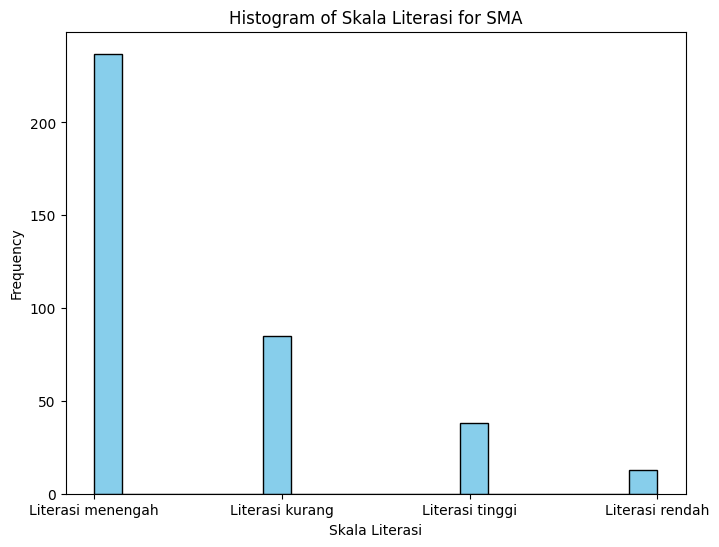

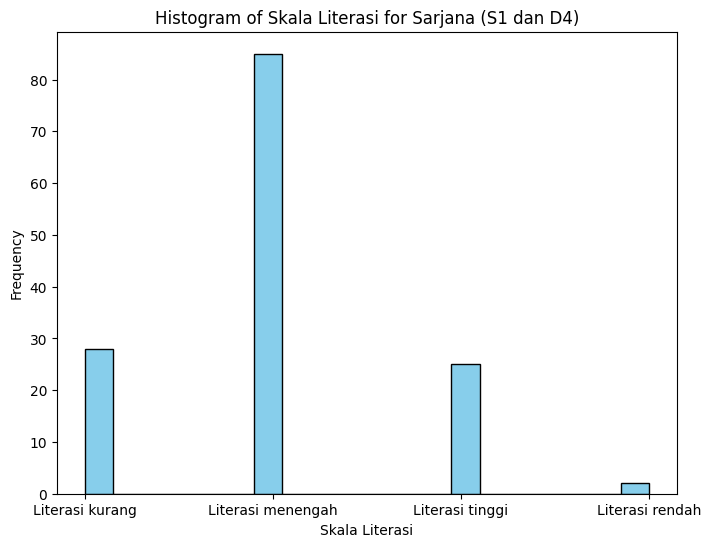

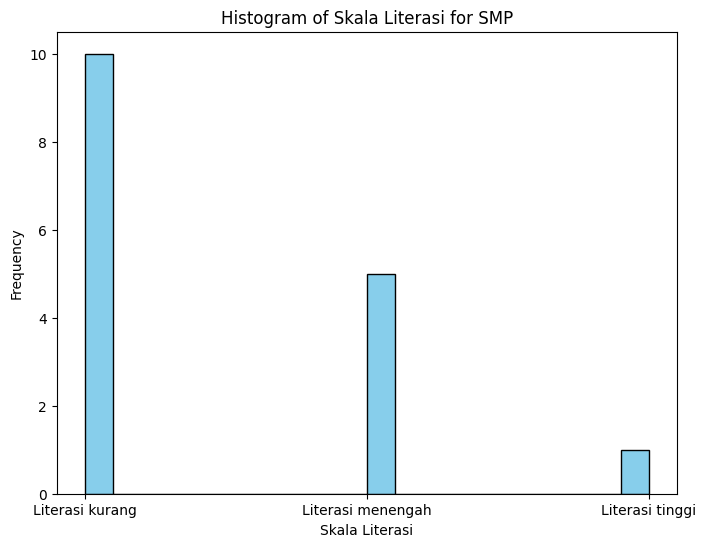

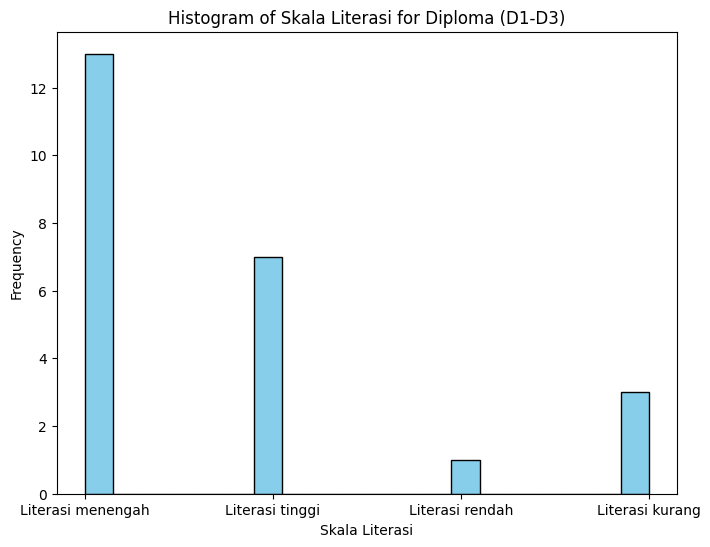

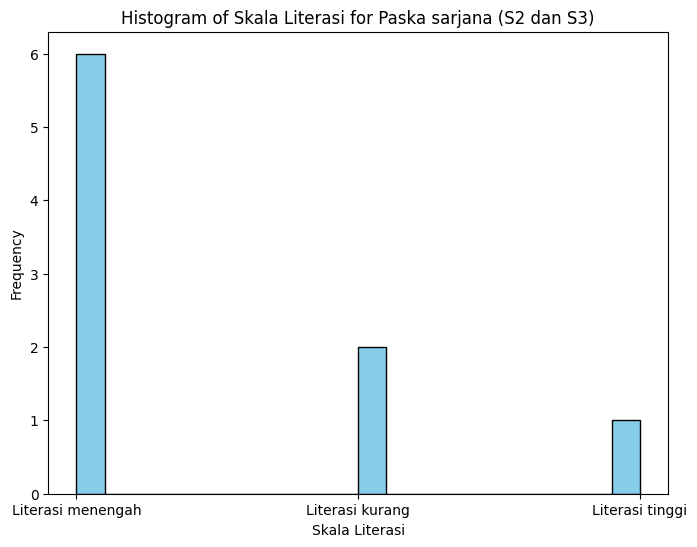

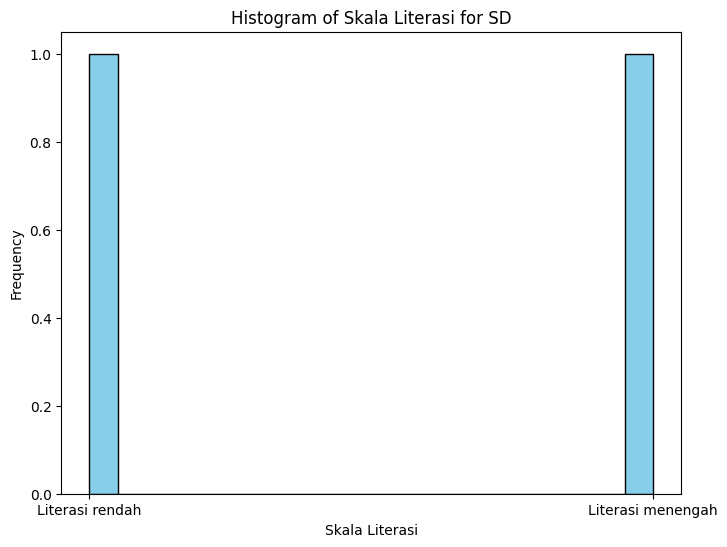

In [62]:
for pendidikan in unique_pendidikan:
  temp_data = full_data[full_data['Pendidikan'] == pendidikan]
  plt.figure(figsize=(8, 6))
  plt.hist(temp_data['skala literasi'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

  # Adding labels and title
  plt.xlabel('Skala Literasi')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of Skala Literasi for {pendidikan}')

  # Show the plot
  plt.show()

### Age

In [63]:
unique_age = full_data.Usia.unique()

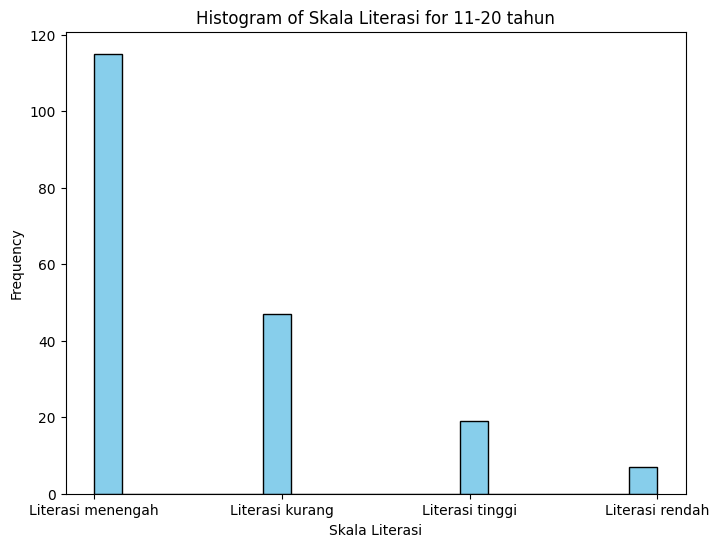

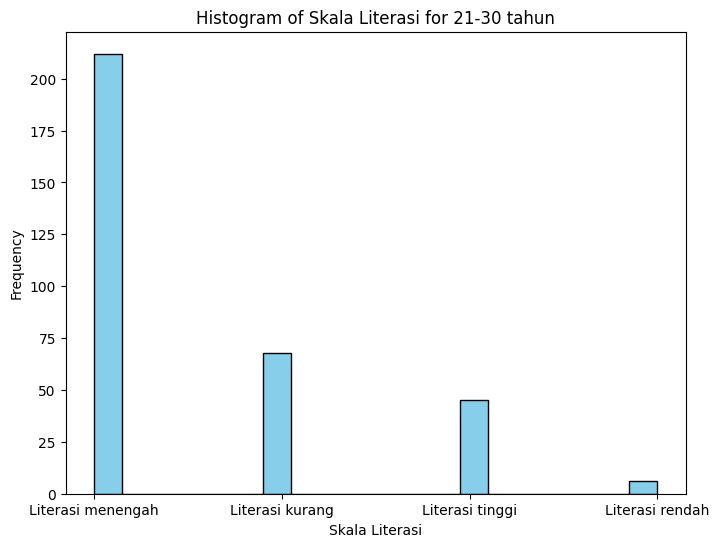

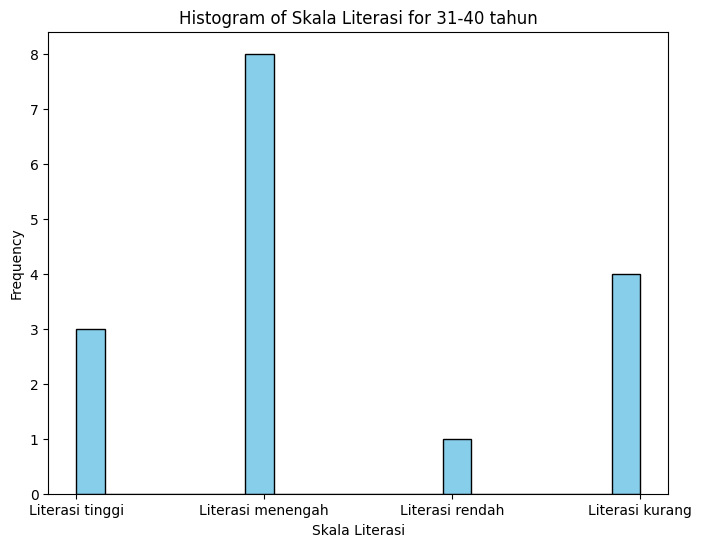

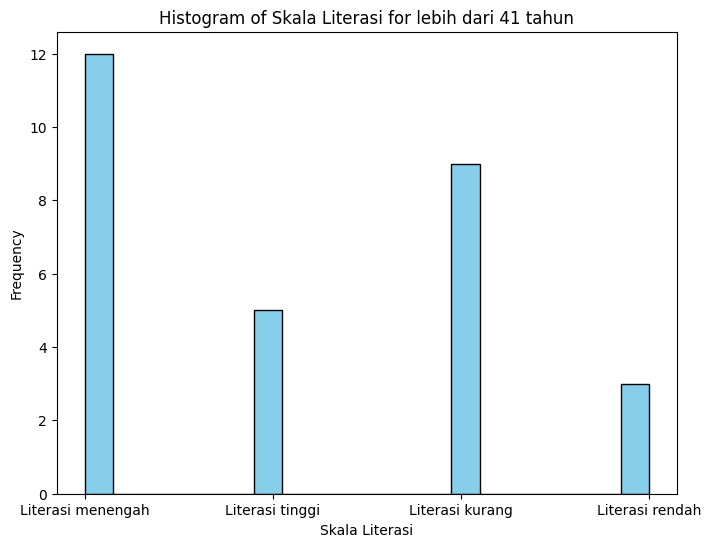

In [64]:
for age in unique_age:
  temp_data = full_data[full_data['Usia'] == age]
  plt.figure(figsize=(8, 6))
  plt.hist(temp_data['skala literasi'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

  # Adding labels and title
  plt.xlabel('Skala Literasi')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of Skala Literasi for {age}')

  # Show the plot
  plt.show()

## Full Data

In [65]:
education_pivot_full = full_data.groupby(by=['Pendidikan','skala literasi']).agg({"skala literasi":"count"})
education_pivot_full

skala literasi
Pendidikan                skala literasi                   
Diploma (D1-D3)           Literasi kurang                 3
                          Literasi menengah              13
                          Literasi rendah                 1
                          Literasi tinggi                 7
Paska sarjana (S2 dan S3) Literasi kurang                 2
                          Literasi menengah               6
                          Literasi tinggi                 1
SD                        Literasi menengah               1
                          Literasi rendah                 1
SMA                       Literasi kurang                85
                          Literasi menengah             237
                          Literasi rendah                13
                          Literasi tinggi                38
SMP                       Literasi kurang                10
                          Literasi menengah               5
                          Literasi tinggi                 1
Sarjana (S1 dan D4)       Literasi kurang                28
                          Literasi menengah              85
                          Literasi rendah                 2
                          Literasi tinggi                25

In [66]:
age_pivot_full = full_data.groupby(by=['Usia','skala literasi']).agg({"skala literasi":"count"})
age_pivot_full

skala literasi
Usia                skala literasi                   
11-20 tahun         Literasi kurang                47
                    Literasi menengah             115
                    Literasi rendah                 7
                    Literasi tinggi                19
21-30 tahun         Literasi kurang                68
                    Literasi menengah             212
                    Literasi rendah                 6
                    Literasi tinggi                45
31-40 tahun         Literasi kurang                 4
                    Literasi menengah               8
                    Literasi rendah                 1
                    Literasi tinggi                 3
lebih dari 41 tahun Literasi kurang                 9
                    Literasi menengah              12
                    Literasi rendah                 3
                    Literasi tinggi                 5

Persentase literasi

In [67]:
for pendidikan in unique_pendidikan:
  temp_data = full_data[full_data['Pendidikan'] == pendidikan]
  total_data = len(temp_data)
  values_count = temp_data['skala literasi'].value_counts()

  # Access unique values and their counts
  unique_values = values_count.index
  counts = values_count.values

  print(f"--{pendidikan}--")
  for i in range(len(counts)):
    print(f"{unique_values[i]} : ", end='')
    print(f"{round((counts[i]/total_data)*100,2)}%")
  print("-----------------------")


--SMA--
Literasi menengah : 63.54%
Literasi kurang : 22.79%
Literasi tinggi : 10.19%
Literasi rendah : 3.49%
-----------------------
--Sarjana (S1 dan D4)--
Literasi menengah : 60.71%
Literasi kurang : 20.0%
Literasi tinggi : 17.86%
Literasi rendah : 1.43%
-----------------------
--SMP--
Literasi kurang : 62.5%
Literasi menengah : 31.25%
Literasi tinggi : 6.25%
-----------------------
--Diploma (D1-D3)--
Literasi menengah : 54.17%
Literasi tinggi : 29.17%
Literasi kurang : 12.5%
Literasi rendah : 4.17%
-----------------------
--Paska sarjana (S2 dan S3)--
Literasi menengah : 66.67%
Literasi kurang : 22.22%
Literasi tinggi : 11.11%
-----------------------
--SD--
Literasi rendah : 50.0%
Literasi menengah : 50.0%
-----------------------


In [68]:
for age in unique_age:
  temp_data = full_data[full_data['Usia'] == age]
  total_data = len(temp_data)
  values_count = temp_data['skala literasi'].value_counts()

  # Access unique values and their counts
  unique_values = values_count.index
  counts = values_count.values

  print(f"--{age}--")
  for i in range(len(counts)):
    print(f"{unique_values[i]} : ", end='')
    print(f"{round((counts[i]/total_data)*100,2)}%")
  print("-----------------------")

--11-20 tahun--
Literasi menengah : 61.17%
Literasi kurang : 25.0%
Literasi tinggi : 10.11%
Literasi rendah : 3.72%
-----------------------
--21-30 tahun--
Literasi menengah : 64.05%
Literasi kurang : 20.54%
Literasi tinggi : 13.6%
Literasi rendah : 1.81%
-----------------------
--31-40 tahun--
Literasi menengah : 50.0%
Literasi kurang : 25.0%
Literasi tinggi : 18.75%
Literasi rendah : 6.25%
-----------------------
--lebih dari 41 tahun--
Literasi menengah : 41.38%
Literasi kurang : 31.03%
Literasi tinggi : 17.24%
Literasi rendah : 10.34%
-----------------------


# Kesimpulan Tingkat Literasi
### Pendidikan
Dalam hal pendidikan, dapat dilihat bahwa tingkat literasi menengah memiliki nilai yang stabil diatas 50% pada semua tingkat pendidikan. Namun pada tingkat literasi tinggi, data menunjukan bahwa orang-orang jurusan Diploma memiliki tingkat literasi paling tinggi sebesar 29%, dengan tingkat sarjana sebagai peringkat kedua (17%) dan pasca sarjana (11%). Hal ini menunjukan bahwa terdapat korelasi meningkatnya tingkat literasi digital dengan pendidikan yang didapat

### Usia
Serupa dengan pendidikan, tingkat literasi digital pada setiap usia memiliki nilai stabil diatas 50%. Namun dapat dilihat bahwa ternyata orang-orang dengan usia tinggi tetap memiliki tingkat literasi yang tinggi, hal ini berbeda dengan hipotesis inisial bahwa orang berusia tinggi memiliki tingkat literasi yang lebih rendah

# Tingkat Keamanan Digital

Mari kita melihat tingkat keamanan data yang dimiliki oleh setiap Age dan Pendidikan

In [69]:
keamanan_data = full_data[['Pendidikan','Usia','personal_info_in_pass',	'change_pass_freq', 'gmail_2FA',	'gmail_2FA_kantor',	'social_media_2FA',
                           'com_media_2FA', 'ecom_2FA']]

In [70]:
keamanan_data.head(4)

,Pendidikan,Usia,personal_info_in_pass,change_pass_freq,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA
0,SMA,11-20 tahun,1,1,1,0,1,1,1
1,SMA,21-30 tahun,1,1,1,1,1,1,1
2,SMA,11-20 tahun,0,0,0,0,0,0,0
3,SMA,21-30 tahun,1,2,0,1,1,0,1


In [71]:
score = []
for row in keamanan_data.index:
  row_score = 0
  for kolom in keamanan_data.columns[2:]:
    row_score = full_data[kolom][row] + row_score
  score.append(row_score)
score[:6]
# Nilai {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

[6, 7, 0, 6, 2, 5]

In [72]:
keamanan_data['keamanan_score'] = score

<ipython-input-72-9a1369596833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keamanan_data['keamanan_score'] = score


In [73]:
keamanan_data.head(4)

,Pendidikan,Usia,personal_info_in_pass,change_pass_freq,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA,keamanan_score
0,SMA,11-20 tahun,1,1,1,0,1,1,1,6
1,SMA,21-30 tahun,1,1,1,1,1,1,1,7
2,SMA,11-20 tahun,0,0,0,0,0,0,0,0
3,SMA,21-30 tahun,1,2,0,1,1,0,1,6


In [74]:
tingkat = []
for row in keamanan_data.index:
  if keamanan_data['keamanan_score'][row] >= 9:
    tingkat.append('Keamanan tinggi')
  elif keamanan_data['keamanan_score'][row] >= 7:
    tingkat.append('Keamanan baik')
  elif keamanan_data['keamanan_score'][row] >= 4:
    tingkat.append('Keamanan menengah')
  elif keamanan_data['keamanan_score'][row] >= 0:
    tingkat.append('Keamanan buruk')

In [75]:
keamanan_data['tingkat_keamanan'] = tingkat

<ipython-input-75-4d8913117b54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keamanan_data['tingkat_keamanan'] = tingkat


In [76]:
keamanan_data.head(4)

,Pendidikan,Usia,personal_info_in_pass,change_pass_freq,gmail_2FA,gmail_2FA_kantor,social_media_2FA,com_media_2FA,ecom_2FA,keamanan_score,tingkat_keamanan
0,SMA,11-20 tahun,1,1,1,0,1,1,1,6,Keamanan menengah
1,SMA,21-30 tahun,1,1,1,1,1,1,1,7,Keamanan baik
2,SMA,11-20 tahun,0,0,0,0,0,0,0,0,Keamanan buruk
3,SMA,21-30 tahun,1,2,0,1,1,0,1,6,Keamanan menengah


Persentase orang yang memiliki tingkat keamanan berdasarkan pendidikan

In [77]:
for pendidikan in unique_pendidikan:
  temp_data = keamanan_data[keamanan_data['Pendidikan'] == pendidikan]
  total_data = len(temp_data)
  values_count = temp_data['tingkat_keamanan'].value_counts()

  # Access unique values and their counts
  unique_values = values_count.index
  counts = values_count.values

  print(f"--{pendidikan}--")
  for i in range(len(counts)):
    print(f"{unique_values[i]} : ", end='')
    print(f"{round((counts[i]/total_data)*100,2)}%")
  print("-----------------------")

--SMA--
Keamanan menengah : 48.53%
Keamanan buruk : 24.4%
Keamanan baik : 21.98%
Keamanan tinggi : 5.09%
-----------------------
--Sarjana (S1 dan D4)--
Keamanan menengah : 49.29%
Keamanan baik : 22.86%
Keamanan buruk : 17.86%
Keamanan tinggi : 10.0%
-----------------------
--SMP--
Keamanan buruk : 37.5%
Keamanan baik : 31.25%
Keamanan menengah : 31.25%
-----------------------
--Diploma (D1-D3)--
Keamanan menengah : 45.83%
Keamanan tinggi : 29.17%
Keamanan baik : 12.5%
Keamanan buruk : 12.5%
-----------------------
--Paska sarjana (S2 dan S3)--
Keamanan menengah : 44.44%
Keamanan baik : 22.22%
Keamanan tinggi : 22.22%
Keamanan buruk : 11.11%
-----------------------
--SD--
Keamanan buruk : 50.0%
Keamanan menengah : 50.0%
-----------------------


In [78]:
for age in unique_age:
  temp_data = keamanan_data[keamanan_data['Usia'] == age]
  total_data = len(temp_data)
  values_count = temp_data['tingkat_keamanan'].value_counts()

  # Access unique values and their counts
  unique_values = values_count.index
  counts = values_count.values

  print(f"--{age}--")
  for i in range(len(counts)):
    print(f"{unique_values[i]} : ", end='')
    print(f"{round((counts[i]/total_data)*100,2)}%")
  print("-----------------------")

--11-20 tahun--
Keamanan menengah : 50.0%
Keamanan buruk : 26.06%
Keamanan baik : 18.62%
Keamanan tinggi : 5.32%
-----------------------
--21-30 tahun--
Keamanan menengah : 48.04%
Keamanan baik : 24.77%
Keamanan buruk : 20.24%
Keamanan tinggi : 6.95%
-----------------------
--31-40 tahun--
Keamanan menengah : 37.5%
Keamanan tinggi : 25.0%
Keamanan baik : 18.75%
Keamanan buruk : 18.75%
-----------------------
--lebih dari 41 tahun--
Keamanan menengah : 41.38%
Keamanan buruk : 27.59%
Keamanan tinggi : 17.24%
Keamanan baik : 13.79%
-----------------------


# Kesimpulan Skala Keamanan
### Pendidikan
Serupa dengan tingkat literasi digital, tingkat keamanan menengah memiliki nilai yang stabil pada median yaitu 40-60% orang memiliki tingkat keamanan menengah. Namun dalam skala keamanan, terdapat lebih banyak orang memiliki tingkat keamanan yang buruk dibandingkan tingkat literasi digital yang buruk. Dalam hal ini, fenomena yang sama terjadi dengan tingkat literasi dimana masyarakat dengan tingkat D3 memiliki tingkat keamanan yang paling baik, dengan S1 dan pasca sarjana menempati peringkat kedua dengan nilai yang berimbang. Jika dibandingkan dengan pendidikan SD, SMP, SMA, nampaknya tingkat keamanan akan berkembang sesuai dengan pendidikan yang diterima.
### Usia
Hal yang serupa pun terjadi pada usia dimana usia yang tinggi memiliki tingkat keamanan yang baik juga. Hal ini berlawanan dengan hipotesa bahwa semakin tinggi umur seseorang maka orang tersebut akan semakin acuh teknologi. Berdasarkan data, nilai tingkat keamanan seseorang stabil pada ketiga umur yang tinggi yaitu dari 21 sampai lebih 41 tahun.

In [79]:
full_data.to_csv('/content/literasi_digital_clean.csv')
keamanan_data.to_csv('/content/literasi_keamanan_clean.csv')